In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sb
from matplotlib.pylab import rcParams
from matplotlib import rc

In [2]:
import os
import glob

In [3]:
# GRAPHICS SETUP:
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=False)
fontSize=16
sb.set_style('dark')
rcParams['ytick.labelsize'] = fontSize
rcParams['xtick.labelsize'] = fontSize
%matplotlib notebook

In [4]:
def PlotArtifacts(dataDict,artNoiseX,**kwargs):
    rng = kwargs.pop("rnge",(0,6e-3))
    colors = kwargs.pop("colors", ['black','indigo','blue','green'])
    savename = kwargs.pop("savename",None)
    band = kwargs.pop("band",'412')
    snr = kwargs.pop("snr", '500')
    f,ax = pl.subplots(figsize=(10,6))
    rhoThresh = 0.001
    f.suptitle(r'$\lambda=%s$ ABS. UNC. w/ NIR SNR=%s ' % (band,snr),fontsize=18)
    firstPass = True
    for col,xsi in zip(colors,artNoiseX):
        lbl0 = float(xsi) * 100
        lbl = r'bias (%%$\rho_t$) : %.1f' % lbl0
        data = dataDict[band][xsi]
        sortedData = np.sort(data)
        rho95 = sortedData[int(np.floor(sortedData.size * .95))]
        pOK = data[data <= rhoThresh].size / data.size * 100
        lbl += r'$\rightarrow$ %.2f%% OK' % pOK
        if firstPass:
            ax.axvspan(0,rhoThresh,color='orange',alpha=0.2,label='threshold')
            firstPass = False
            ax.axvline(x=rho95,color=col,label="95%",linestyle='--')
        else:
            ax.axvline(x=rho95,color=col,linestyle='--')
        ax.hist(data,bins=100,range=rng,histtype='stepfilled',color=col,
                alpha=0.65,normed=True,label=lbl)

        #ax.set_title(r'$\sigma_{\rho_w}$ (art. unc: %s)' % xsi)
    ax.legend(loc='best',fontsize=fontSize-3)
    ax.set_xlabel(r'$ \rho_w$ inc. added bias as % $\rho_t$', fontsize=fontSize)
    ax.set_ylabel('Freq.',fontsize=fontSize)
    ax.ticklabel_format(axis='both',style='sci',scilimits=(1,3))
    if savename:
        f.savefig(savename,dpi=300,format='png')


In [5]:
mainDir='/accounts/ekarakoy/disk02/UNCERTAINTIES/Monte-Carlo/PACE_SNR/\
DATA/L2_L3/FullScale/GLOBALS/S2003193196/NIR_SensWithRhoT/'
simDirDict={k:'NIR_SNR_' + str(k) for k in range(500,850,50)}
l3bDir='L3bs'
filePattern = 'S20031932003196.L3b_4D*'

In [6]:
nirSnr = 550
fp = glob.glob(os.path.join(mainDir,simDirDict[nirSnr],l3bDir,filePattern))[0]

In [7]:
with nc.Dataset(fp) as ds:
    l3bVars = ds.groups['level-3_binned_data'].variables
    binlist = l3bVars['BinList'][:]
    wts = binlist['weights']
    bands = ['412', '443', '490', '510', '555', '670', '765', '865']
    rhoDict = {}
    rhoUncDict = {}
    rhotDict = {} 
    for band in bands:
        rhoDict[band] = np.pi * l3bVars['Rrs_%s' % band][:]['sum'] / wts
        rhoUncDict[band] = np.pi * l3bVars['Rrs_unc_%s' % band][:]['sum'] / wts
        rhotDict[band] = l3bVars['rhot_%s' % band][:]['sum'] / wts

In [8]:
rhoWUncDict = dict.fromkeys(bands)
xs = ['0','0.002','0.005','0.010']
for band in bands:
        rhoWUncDict[band] = dict.fromkeys(xs)

In [9]:
for band in bands:
    for xsi in xs:
        rhoWUncDict[band][xsi] = np.sqrt(
                                          np.power(rhoUncDict[band],2) + 
                                          np.power((float(xsi) * rhotDict[band]),2)
                                         )

<IPython.core.display.Javascript object>


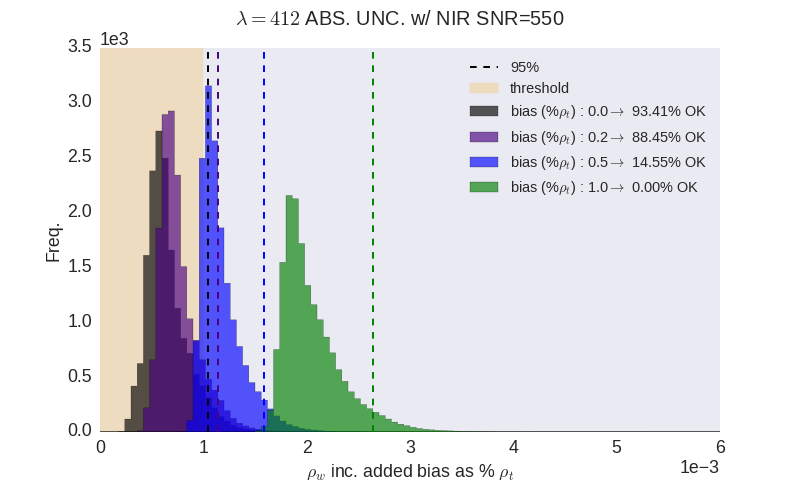

In [10]:
band='412'
snr = str(nirSnr)
mainFigDir = '/accounts/ekarakoy/UNCERTAINTIES/figs/ArtifactNoise/'
nirSnrDir = 'NIR_SNR_' + snr
figpath=os.path.join(mainFigDir,nirSnrDir,'lam_%s.png' % band)
rng = (0,6e-3)
PlotArtifacts(rhoWUncDict,artNoiseX=xs,savename=figpath,rng=rng,snr=nirSnr)

<IPython.core.display.Javascript object>


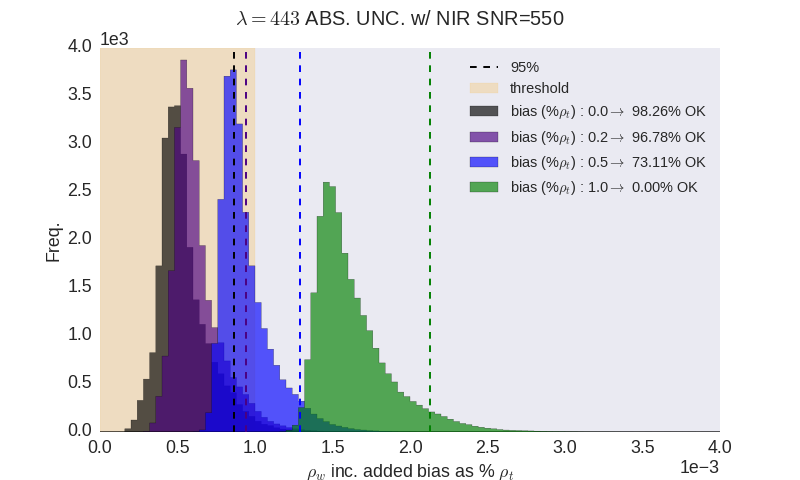

In [11]:
band='443'
mainFigDir = '/accounts/ekarakoy/UNCERTAINTIES/figs/ArtifactNoise/'
nirSnrDir = 'NIR_SNR_%d' % nirSnr 
figpath=os.path.join(mainFigDir,nirSnrDir,'lam_%s.png' % band)
rng = (0,4e-3)
PlotArtifacts(rhoWUncDict,artNoiseX=xs,savename=figpath,rnge=rng,band=band,
              snr=nirSnr)

<IPython.core.display.Javascript object>


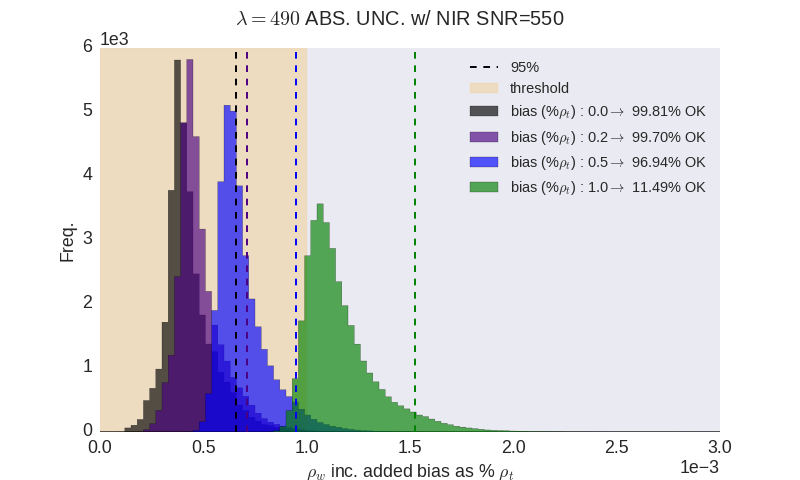

In [12]:
band='490'
mainFigDir = '/accounts/ekarakoy/UNCERTAINTIES/figs/ArtifactNoise/'
nirSnrDir = 'NIR_SNR_%d' % nirSnr 
figpath=os.path.join(mainFigDir,nirSnrDir,'lam_%s.png' % band)
rng = (0,3e-3)
PlotArtifacts(rhoWUncDict,artNoiseX=xs,savename=figpath,rnge=rng,band=band,
             snr=nirSnr)

<IPython.core.display.Javascript object>


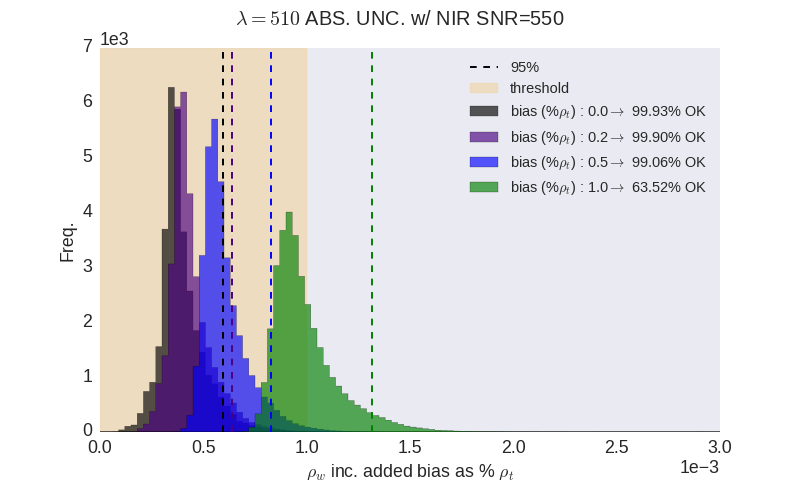

In [13]:
band='510'
mainFigDir = '/accounts/ekarakoy/UNCERTAINTIES/figs/ArtifactNoise/'
nirSnrDir = 'NIR_SNR_%d' % nirSnr 
figpath=os.path.join(mainFigDir,nirSnrDir,'lam_%s.png' % band)
rng = (0,3e-3)
PlotArtifacts(rhoWUncDict,artNoiseX=xs,savename=figpath,rnge=rng,band=band,
             snr=nirSnr)

In [14]:
rhoWUncDict = dict.fromkeys(bands)
xs = ['0','0.010','0.015','0.020']
for band in bands:
        rhoWUncDict[band] = dict.fromkeys(xs)
for band in bands:
    for xsi in xs:
        rhoWUncDict[band][xsi] = np.sqrt(
                                          np.power(rhoUncDict[band],2) + 
                                          np.power((float(xsi) * rhotDict[band]),2)
                                         )

<IPython.core.display.Javascript object>


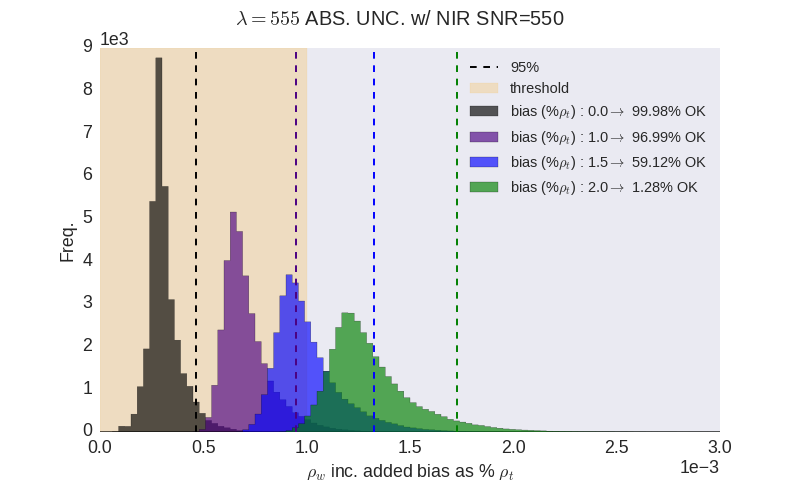

In [15]:
band='555'
mainFigDir = '/accounts/ekarakoy/UNCERTAINTIES/figs/ArtifactNoise/'
nirSnrDir = 'NIR_SNR_%d' % nirSnr 
figpath=os.path.join(mainFigDir,nirSnrDir,'lam_%s.png' % band)
rng = (0,3e-3)
PlotArtifacts(rhoWUncDict,artNoiseX=xs,savename=figpath,rnge=rng,band=band,
             snr=nirSnr)

In [16]:
# HERE WE FIND BIASES FOR EACH BAND SUCH THAT THE THRESHOLD IS MET

import pickle
import scipy.optimize

def FindBiasPercdata(x):
    global data
    global uncData
    thresh = 0.001
    targData = np.sqrt(np.power(uncData, 2) + np.power((x/100)*data, 2))
    sortedData = np.sort(targData)
    rho95 = sortedData[int(np.floor(sortedData.size * .95))]
    result = abs(rho95 - thresh)
    return result

Xfor95_path = '/accounts/ekarakoy/UNCERTAINTIES/datafiles/BiasError/XBiasFor95.p'
if os.path.exists(Xfor95_path):
    Xfor95Dict = pickle.load(open(Xfor95_path, 'rb'))
else:
    Xfor95Dict = dict.fromkeys(simDirDict.values())
Xfor95Dict[nirSnrDir] = dict.fromkeys(bands[:-2])
for band in bands[:-2]:
    data = rhotDict[band]
    uncData = rhoUncDict[band]
    rngs = slice(0, 5, 0.25)
    x_targ = scipy.optimize.brute(FindBiasPercdata, (rngs,))
    print("%s: %s: %.3f" % (nirSnrDir, band, x_targ))
    Xfor95Dict[nirSnrDir][band] = x_targ
pickle.dump(Xfor95Dict, open(Xfor95_path, 'wb'))

NIR_SNR_550: 412: 0.000
NIR_SNR_550: 443: 0.264
NIR_SNR_550: 490: 0.552
NIR_SNR_550: 510: 0.689
NIR_SNR_550: 555: 1.073
NIR_SNR_550: 670: 2.111


In [17]:
print(Xfor95Dict)

{'NIR_SNR_600': None, 'NIR_SNR_800': None, 'NIR_SNR_500': {'443': array([ 0.19462891]), '510': array([ 0.65932617]), '490': array([ 0.51796875]), '555': array([ 1.04951172]), '670': array([ 2.10302734]), '412': array([ 0.])}, 'NIR_SNR_750': None, 'NIR_SNR_700': None, 'NIR_SNR_550': {'490': array([ 0.55224609]), '510': array([ 0.68942871]), '443': array([ 0.26445312]), '555': array([ 1.07265625]), '670': array([ 2.11064453]), '412': array([ 0.])}, 'NIR_SNR_650': None}


In [18]:
def Get95Ptiles(biasList, dataDict):
    rho95Dict = dict.fromkeys(bands[:-2])
    for band in bands[:-2]:
        rho95Dict[band] = dict.fromkeys(biasList)
        for bias in biasList:
            data = dataDict[band][bias]
            sortedData = np.sort(data)
            rho95Dict[band][bias] = sortedData[int(np.floor(sortedData.size * .95))]
    return rho95Dict

rhoWUncDict = dict.fromkeys(bands)
xs = ['0','0.002','0.005','0.010','0.015','0.020']
for band in bands:
        rhoWUncDict[band] = dict.fromkeys(xs)
for band in bands:
    for xsi in xs:
        rhoWUncDict[band][xsi] = np.sqrt(
                                          np.power(rhoUncDict[band],2) + 
                                          np.power((float(xsi) * rhotDict[band]),2)
                                         )
Rho95tileDictPath = '/accounts/ekarakoy/UNCERTAINTIES/datafiles/BiasError/rho95TtilDict.p'
if os.path.exists(Rho95tileDictPath):
    rho95tileDict = pickle.load(open(Rho95tileDictPath, 'rb'))
else:
    rho95tileDict = dict.fromkeys(simDirDict.values())
    
rho95tileDict[nirSnrDir] = Get95Ptiles(xs,rhoWUncDict)
pickle.dump(rho95tileDict,open(Rho95tileDictPath,'wb'))

In [20]:
rho95tileDict

{'NIR_SNR_500': {'412': {'0': 0.0011184107,
   '0.002': 0.0012146807,
   '0.005': 0.0016363405,
   '0.010': 0.0026687302,
   '0.015': 0.0038253167,
   '0.020': 0.0050163269},
  '443': {'0': 0.00092991267,
   '0.002': 0.0010037575,
   '0.005': 0.001333173,
   '0.010': 0.0021503766,
   '0.015': 0.0030729473,
   '0.020': 0.0040243817},
  '490': {'0': 0.00071419269,
   '0.002': 0.00076234015,
   '0.005': 0.0009827402,
   '0.010': 0.001546131,
   '0.015': 0.0021906525,
   '0.020': 0.0028591638},
  '510': {'0': 0.00064402923,
   '0.002': 0.00068258232,
   '0.005': 0.00086379639,
   '0.010': 0.0013377706,
   '0.015': 0.0018847811,
   '0.020': 0.0024547318},
  '555': {'0': 0.00050265866,
   '0.002': 0.00052576221,
   '0.005': 0.00064425683,
   '0.010': 0.00096442411,
   '0.015': 0.0013405065,
   '0.020': 0.0017357029},
  '670': {'0': 0.00023457017,
   '0.002': 0.00025029131,
   '0.005': 0.0003230912,
   '0.010': 0.00051280571,
   '0.015': 0.00072908378,
   '0.020': 0.00095335476}},
 'NIR_SNR_5